Linear regression (линейная регрессия)

Дано: $x_i$, $y_i$, $i = \overline{1,n}$

$y \approx y' = f(x)$

$f(x) = a_0 + a_1 x$

$|y' - y|^2 = \sum\limits_{i=1}^n (y'_i - y_i)^2 \rightarrow min$

$\frac 1 n \sum\limits_{i=1}^n (y'_i - y_i)^2$


Gradient descent (градиентный спуск)

$x_{i+1} = x_i - \alpha \nabla f(x_i)$

$\alpha$ -- learning rate
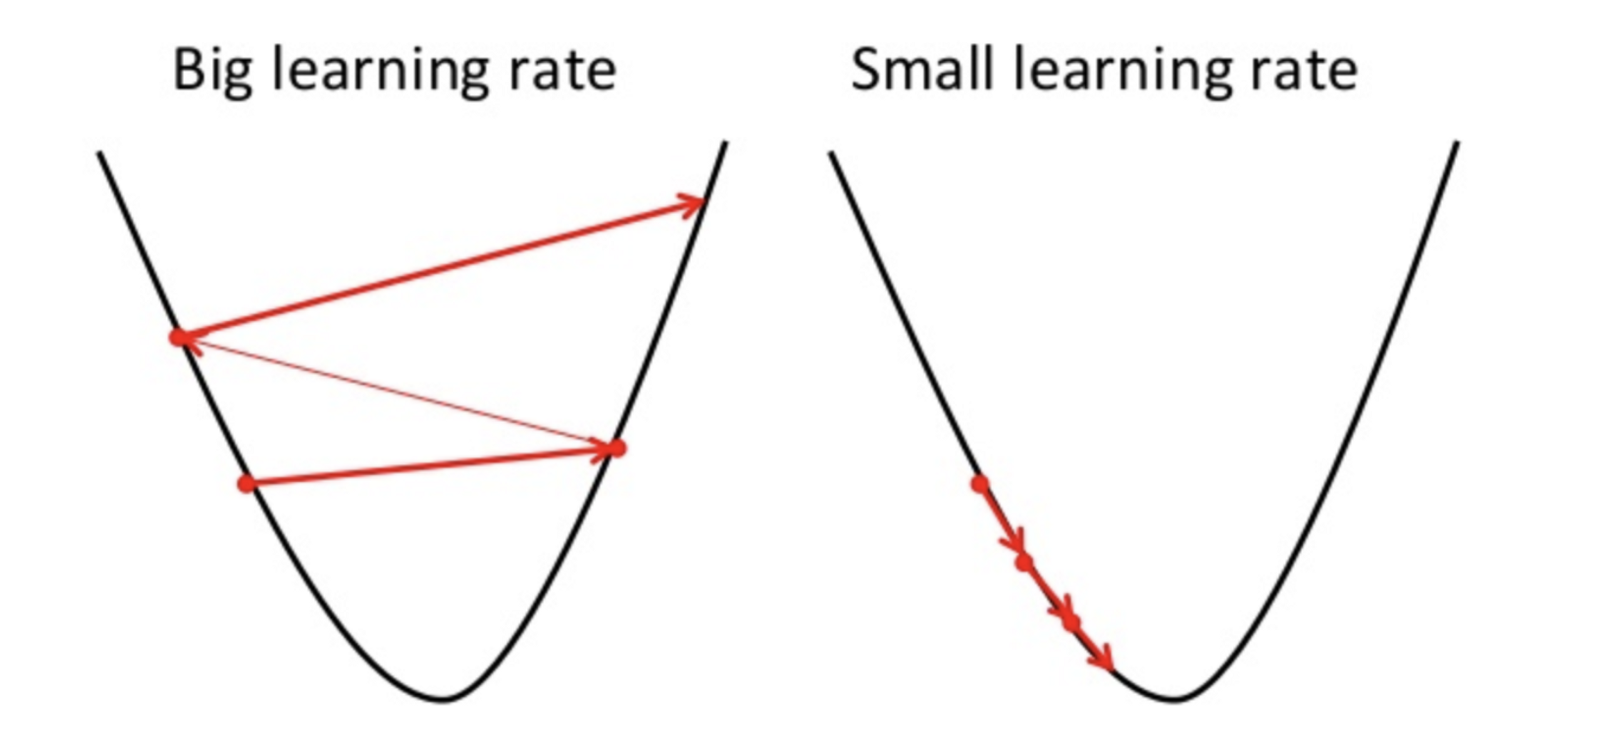

$J(x) = \frac 1 n \sum (y'_i - y_i)^2 = \frac 1 n \sum (a_0 + a_1 x_i - y_i)^2$ 

$\frac {\partial J} {\partial a_0} = \frac 2 n \sum (a_0 + a_1 x_i - y_i) = \frac 2 n \sum y'_i - y_i$

$\frac {\partial J} {\partial a_1} = \frac 2 n \sum (a_0 + a_1 x_i - y_i) x_i = \frac 2 n \sum (y'_i - y_i) x_i$


In [148]:
# https://www.kaggle.com/andonians/random-linear-regression/data
import pandas as pd
import numpy as np

path = ''
df_train = pd.read_csv(path + 'ml_practice_2_train.csv')
df_test = pd.read_csv(path + 'ml_practice_2_test.csv')

x_train = np.array(df_train['x'])
y_train = np.array(df_train['y'])
x_test = np.array(df_test['x'])
y_test = np.array(df_test['y'])

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

R2: 0.7172694256655501


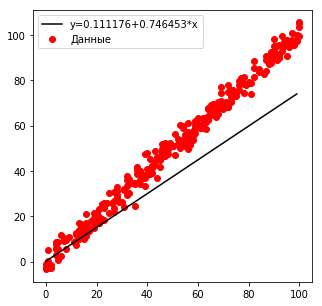

In [151]:
import matplotlib.pyplot as plt 

#a_0 = 3
#a_1 = 1
y_prediction = a_0 + a_1 * x_test
print('R2:',r2_score(y_test,y_prediction))

y_plot = [a_0 + a_1 * i for i in range(100)]
plt.figure(figsize=(5,5))
plt.scatter(x_test, y_test, color='red', label='Данные')
plt.plot(range(len(y_plot)), y_plot, color='black', label = 'y={0:3f}+{1:3f}*x'.format(a_0, a_1))
z = plt.legend()
#plt.show()

In [149]:
np.isfinite(y_train).all()

True

In [150]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

clf = LinearRegression(normalize=False)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(r2_score(y_test, y_pred))
(clf.coef_, clf.intercept_)

0.9887991524196075


(array([1.00077825]), -0.12015553181321792)

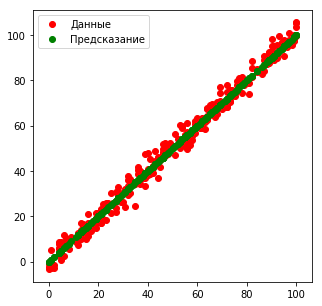

In [124]:
plt.figure(figsize=(5,5))
plt.scatter(x_test, y_test, color='red', label='Данные')
plt.scatter(x_test, y_pred, color='green', label='Предсказание')
z=plt.legend()
#z = plt.plot(range(len(y_pred)), y_pred, color='black', label = 'Модель')


In [140]:
alpha = 1e-5

a_0 = 0 #np.zeros((n,1))
a_1 = 0 # np.zeros((n,1))

for iter in range(400):
    y = a_0 + a_1 * x_train
    error = y - y_train
    #print(error)
    a_0 = a_0 - alpha * 2 * np.average(error) 
    a_1 = a_1 - alpha * 2 * np.average(error * x_train)
    if iter % 10 == 0:
        mean_sq_er = np.average(error**2)
        #print(mean_sq_er)
(a_0, a_1, mean_sq_er)

(0.11117627621900467, 0.7464531103739798, 1467.350011536382)

R2: 0.7172694256655501


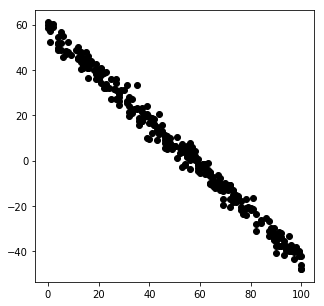

In [152]:
#y_prediction = clf.predict(x_test)
y_prediction = a_0 + a_1 * x_test
y_residue = y_prediction[0] - y_test
#print(y_residue)
print('R2:',r2_score(y_test, y_prediction))

plt.figure(figsize=(5,5))
#plt.scatter(x_test, y_test, color='red', label='Данные')
plt.scatter(x_test, y_residue, color='black')
#z = plt.legend()